Python project: we are working on a data set of Facebook comments: The objective of this project is to create a model to predict informations on Facebook comments from this data set: : https://archive.ics.uci.edu/dataset/363/facebook+comment+volume+dataset

In [ ]:
#Imports :
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV for hyperparameter tuning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from flask import Flask, request, jsonify

print("imported")

imported


Import : data csv :
I will put here the path to access the data on google colab runing on my linux computer. Just change it if you want to run this program on your computer.

In [ ]:
path_file = "/content/Features_Variant_1.csv"  #We use a / because we work on linux : remove it if you are on windows
#(path to be changed)
data = pd.read_csv(path_file)
print(data.head())
print("lenght  of the file :", len(data))


   634995  0  463  1  0.0  806.0  11.291044776119403  1.0  70.49513846124168  \
0  634995  0  463  1  0.0  806.0           11.291045  1.0          70.495138   
1  634995  0  463  1  0.0  806.0           11.291045  1.0          70.495138   
2  634995  0  463  1  0.0  806.0           11.291045  1.0          70.495138   
3  634995  0  463  1  0.0  806.0           11.291045  1.0          70.495138   
4  634995  0  463  1  0.0  806.0           11.291045  1.0          70.495138   

   0.0.1  ...  0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18  1.2  0.19  
0    0.0  ...     0     0     0     0     0     0     0     1    0     0  
1    0.0  ...     1     0     0     0     0     0     0     0    1     0  
2    0.0  ...     1     0     0     1     0     0     0     0    0     0  
3    0.0  ...     0     0     0     0     0     1     0     0    0     0  
4    0.0  ...     0     0     0     0     0     0     0     1    0     0  

[5 rows x 54 columns]
lenght  of the file : 40948


First, we want to print the type of the variables, and the number of null data in our data : so we can clean it

In [ ]:
print(data.info())
print (data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40948 entries, 0 to 40947
Data columns (total 54 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   634995              40948 non-null  int64  
 1   0                   40948 non-null  int64  
 2   463                 40948 non-null  int64  
 3   1                   40948 non-null  int64  
 4   0.0                 40948 non-null  float64
 5   806.0               40948 non-null  float64
 6   11.291044776119403  40948 non-null  float64
 7   1.0                 40948 non-null  float64
 8   70.49513846124168   40948 non-null  float64
 9   0.0.1               40948 non-null  float64
 10  806.0.1             40948 non-null  float64
 11  7.574626865671642   40948 non-null  float64
 12  0.0.2               40948 non-null  float64
 13  69.435826365571     40948 non-null  float64
 14  0.0.3               40948 non-null  float64
 15  76.0                40948 non-null  float64
 16  2.60

We notice that the is not any null value in our data frame, and that it is only composed of integers. So, we don't need to clean it


We will name those columns : Datas will be easyer to work with if they have a name. We will be abble to understand what we are dooing. We will use the names that are defined into the documentation.


In [ ]:
new_column_names = [
    'Page_Popularity/likes', 'Page_Checkins', 'Page_talking_about', 'Page_Category',
    'Derived_5', 'Derived_6', 'Derived_7', 'Derived_8', 'Derived_9', 'Derived_10',
    'Derived_11', 'Derived_12', 'Derived_13', 'Derived_14', 'Derived_15', 'Derived_16',
    'Derived_17', 'Derived_18', 'Derived_19', 'Derived_20', 'Derived_21', 'Derived_22',
    'Derived_23', 'Derived_24', 'Derived_25', 'Derived_26', 'Derived_27', 'Derived_28',
    'Derived_29', 'CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'Base_time', 'Post_length',
    'Post_Share_Count', 'Post_Promotion_Status', 'H_Local', 'Post_published_weekday_1',
    'Post_published_weekday_2', 'Post_published_weekday_3', 'Post_published_weekday_4',
    'Post_published_weekday_5', 'Post_published_weekday_6', 'Post_published_weekday_7',
    'Base_DateTime_weekday_1', 'Base_DateTime_weekday_2', 'Base_DateTime_weekday_3',
    'Base_DateTime_weekday_4', 'Base_DateTime_weekday_5', 'Base_DateTime_weekday_6',
    'Base_DateTime_weekday_7', 'Target_Variable'
]
#The names of the comumns are explained in the website where we found the data frame
data.columns = new_column_names

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40948 entries, 0 to 40947
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Page_Popularity/likes     40948 non-null  int64  
 1   Page_Checkins             40948 non-null  int64  
 2   Page_talking_about        40948 non-null  int64  
 3   Page_Category             40948 non-null  int64  
 4   Derived_5                 40948 non-null  float64
 5   Derived_6                 40948 non-null  float64
 6   Derived_7                 40948 non-null  float64
 7   Derived_8                 40948 non-null  float64
 8   Derived_9                 40948 non-null  float64
 9   Derived_10                40948 non-null  float64
 10  Derived_11                40948 non-null  float64
 11  Derived_12                40948 non-null  float64
 12  Derived_13                40948 non-null  float64
 13  Derived_14                40948 non-null  float64
 14  Derive

It is done : we are not abble to study each column understanding what we are talking about. We print the heuristics to see what we can say about our variables :

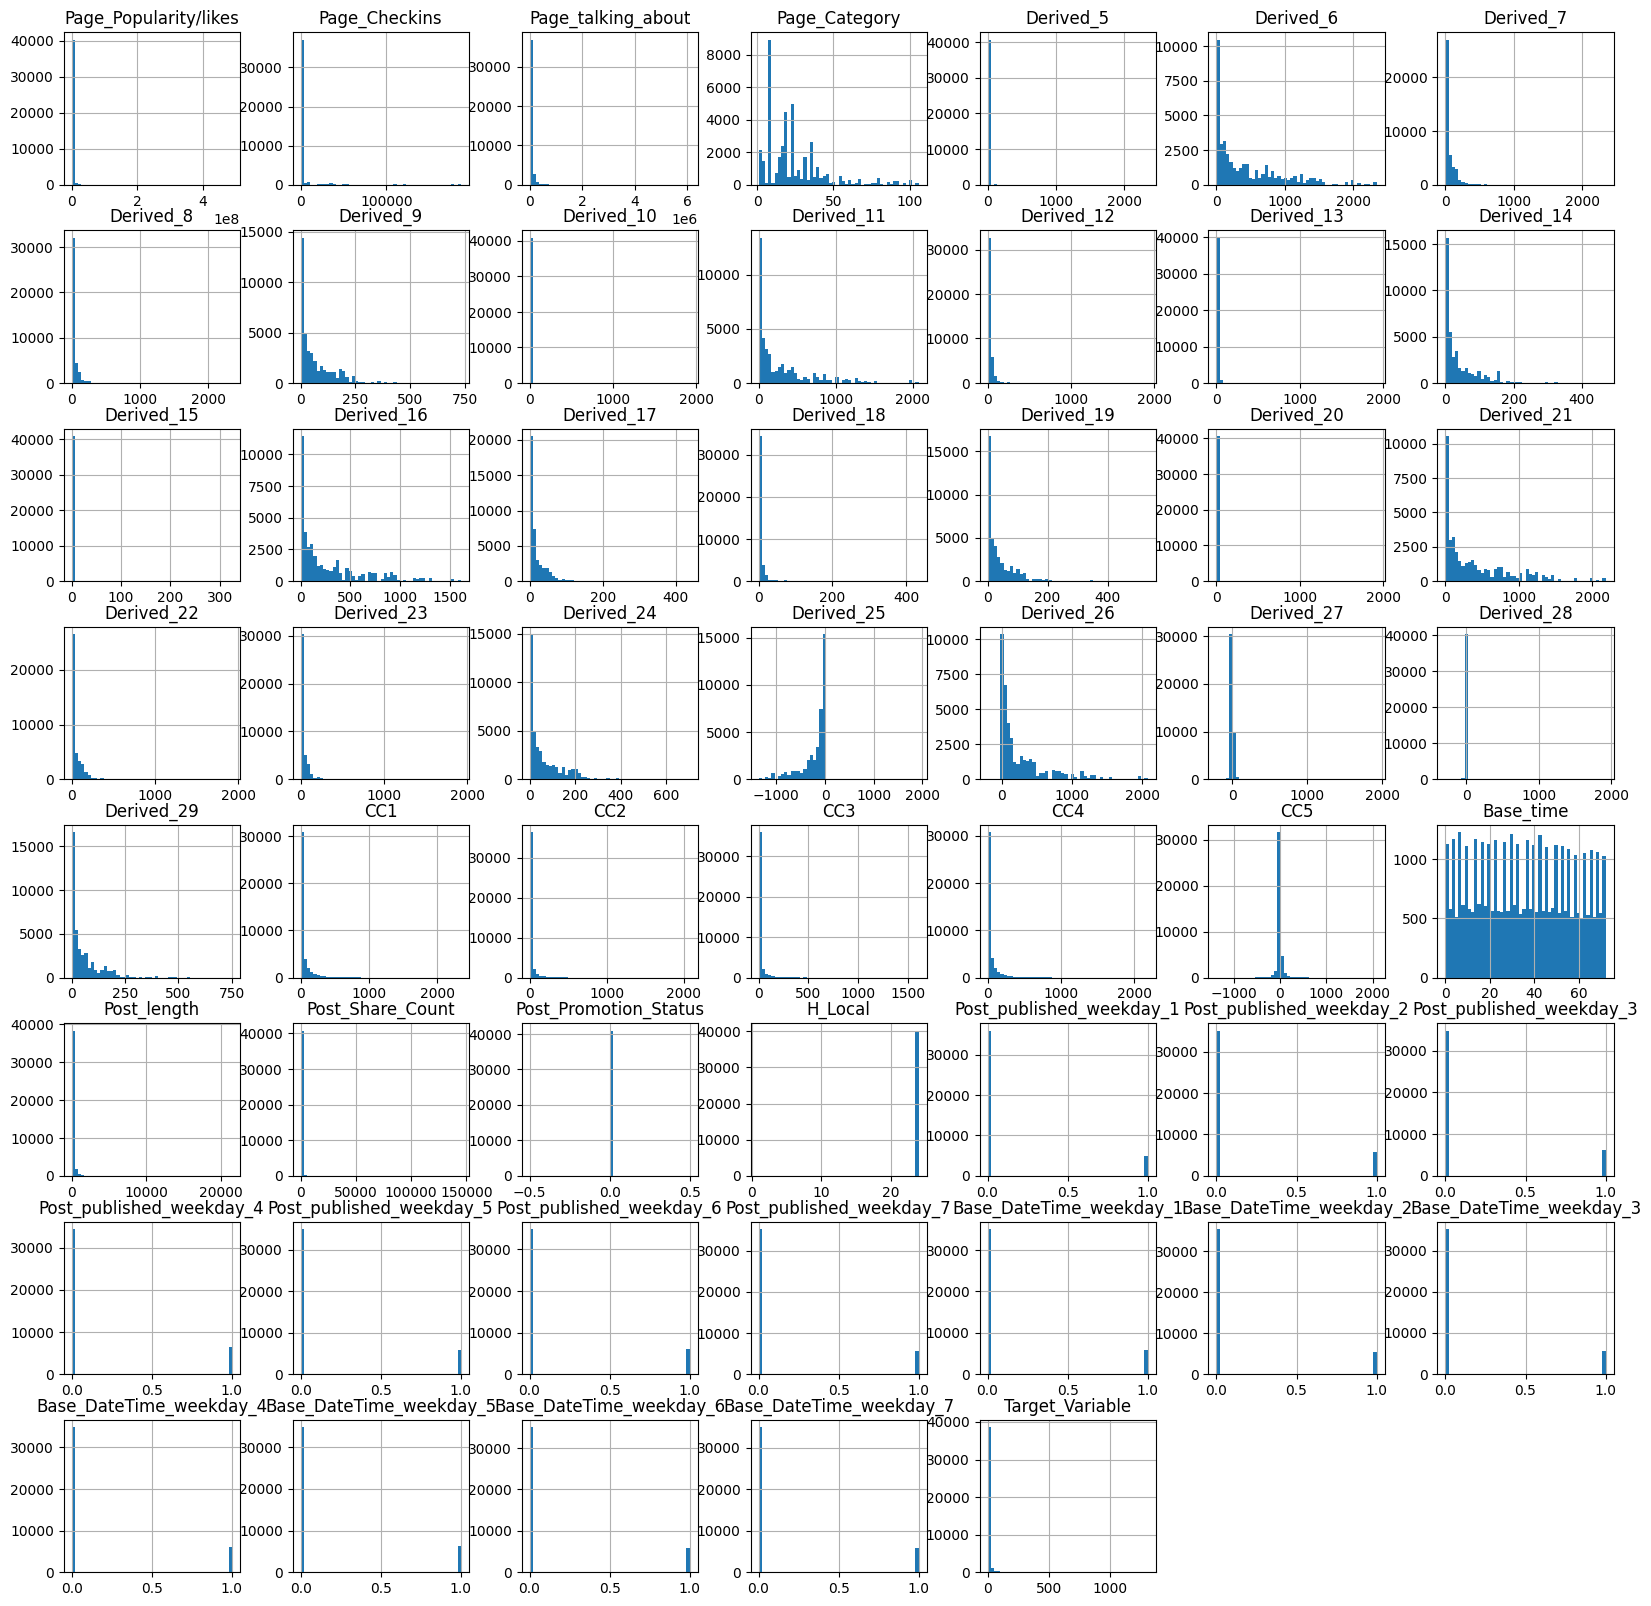

In [ ]:
data.hist(bins=50,figsize=(20,20))
plt.show()

We need more vision over those datas : We want to print the quantiles of the datas to understand them better :

In [ ]:
print(data.describe())

       Page_Popularity/likes  Page_Checkins  Page_talking_about  \
count           4.094800e+04   40948.000000        4.094800e+04   
mean            1.313830e+06    4676.247949        4.480133e+04   
std             6.785834e+06   20593.423357        1.109349e+05   
min             3.600000e+01       0.000000        0.000000e+00   
25%             3.673400e+04       0.000000        6.980000e+02   
50%             2.929110e+05       0.000000        7.141000e+03   
75%             1.204214e+06      99.000000        5.026400e+04   
max             4.869723e+08  186370.000000        6.089942e+06   

       Page_Category     Derived_5     Derived_6     Derived_7     Derived_8  \
count   40948.000000  40948.000000  40948.000000  40948.000000  40948.000000   
mean       24.255348      1.586280    443.324998     55.721469     35.646381   
std        19.950496     20.753426    496.698029     86.934332     69.960877   
min         1.000000      0.000000      0.000000      0.000000      0.000000

It is impossible to treat effitiently all of this columns. We have to many. If we directly apply an AI algorithm on this set, we will have a lack of performance due to the large number of columns. We want to simplify our data frame to have a better prediction, on fewer data.


We can see sevral things. First : we will try to spot the irrelevent values that we will not use because there are constant. For exemple : Derrivated_10 seems to be irrelevent.
We will buind a function that whill tell us if a column seems to be irrelevent :

In [ ]:
column_name = 'Derived_10'

# Calculus of the average value :
mean_value = data[column_name].mean()

# Calculus of the standard deviation
std_deviation = data[column_name].std()
zero_count = (data[column_name] == 0).sum()  # Count the number of zeros
zero_ratio = 100*zero_count/len(data['Derived_10'])
# print of the results :
print(f"Mean of the column :'{column_name}': {mean_value}")
print(f"Standart deviation of the column :'{column_name}': {std_deviation}")
print(f"Number of values equal to zero : '{column_name}': {zero_count}")
print(f"Ratio of values equal to zero :'{column_name}': {zero_ratio}","%")

Mean of the column :'Derived_10': 0.21947347855817134
Standart deviation of the column :'Derived_10': 10.05526841433964
Number of values equal to zero : 'Derived_10': 40246
Ratio of values equal to zero :'Derived_10': 98.2856305558269 %


It will be really hard to exploit a data witch is null 98.2% of the time. We can't do anything about this data. This is the description of derivates : These features are aggregated by page, by calculating min, max, average, median and standard deviation of essential features.
It is imposible to use this column

We now want to see if there are some comumns that are signifently simmilar. If two (or more) columns are similar, we will ba abble to drop the colomuns that we have more than one time. We print the heuristics :

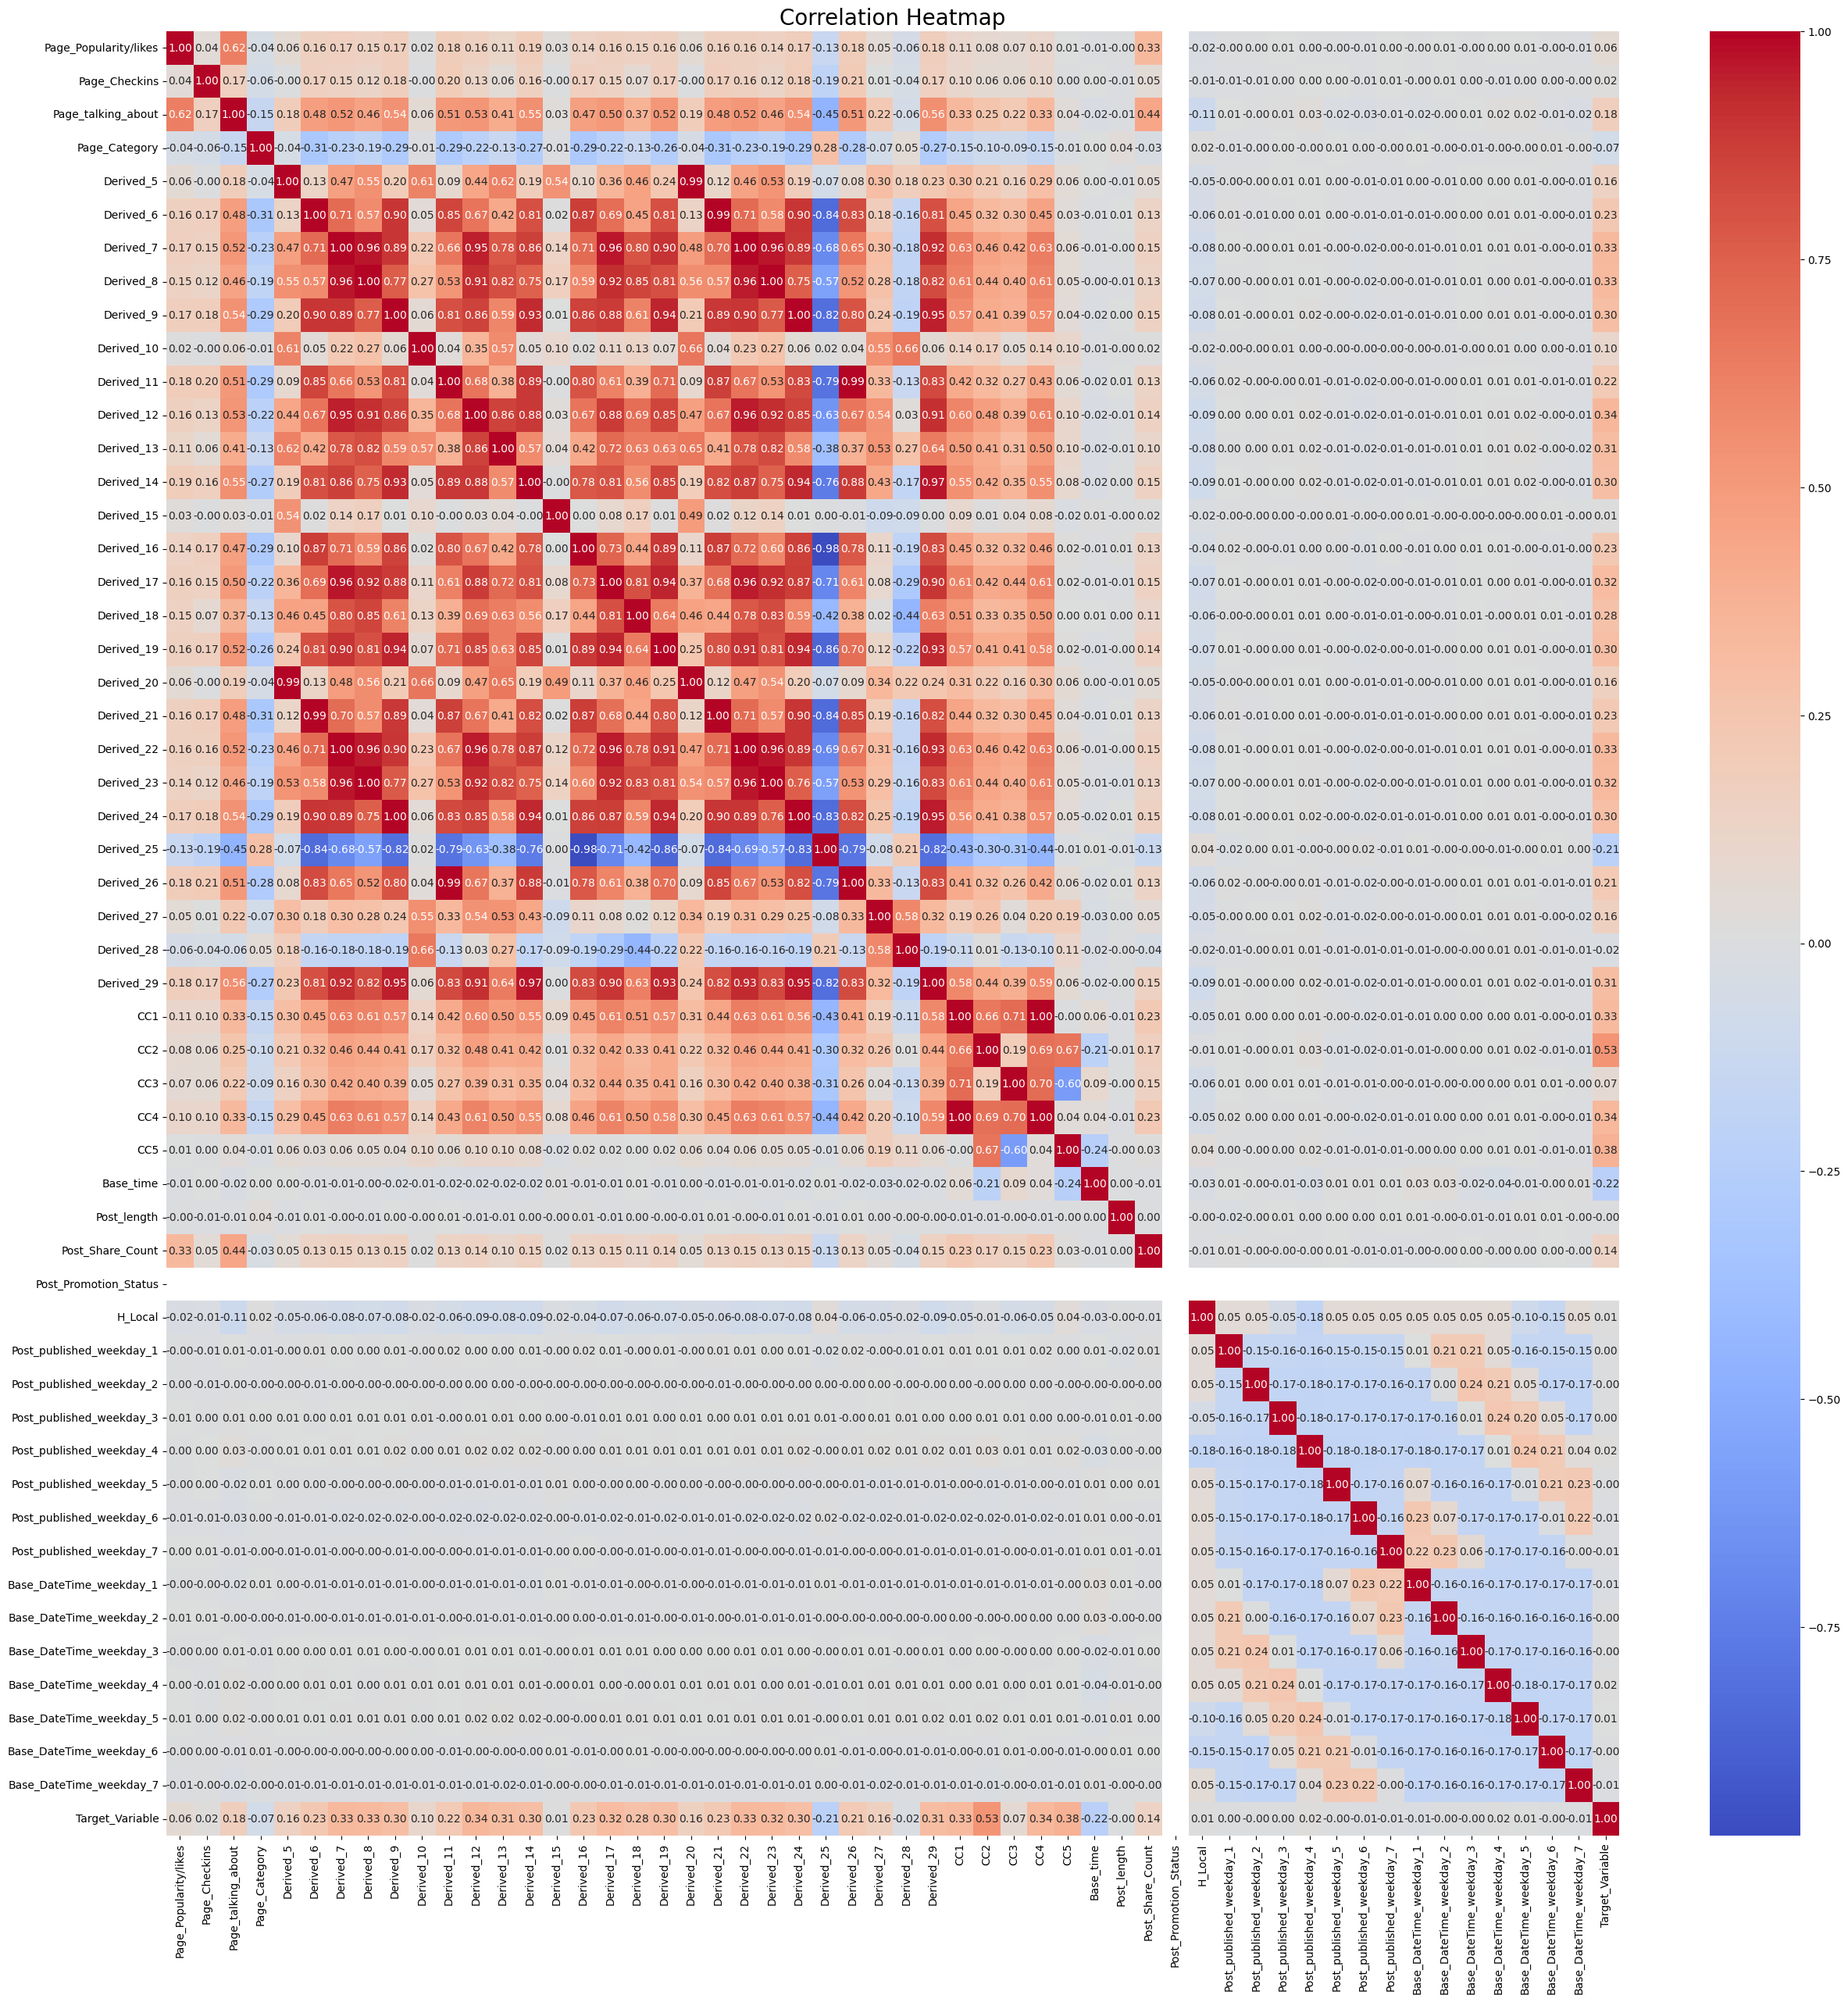

In [ ]:
plt.figure(figsize=(30, 30))
heatmap = sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.set_title("Correlation Heatmap", fontsize=20)
plt.show()

We observ plenty of corelations. It will be to long to erraze them by hand. We write a programm to clean the data set. We want to print the numbers of the collumns that we want to remove. We define that we want to drop columns with a corelation supperior to 0.8 (or 80%).

In [ ]:
def calculate_correlation(variables1, variables2): #Claculate the correlation between two different data columns
    correlation = np.corrcoef(variables1, variables2)[0, 1]

    return correlation*100
list_corel = [] # We init a list that will contain all of the corel between the lists of data : we will only consider data that have more corelation than our criteria

corelation_criteria = 80 #Meaning that we will only try to delete data that arre corelated at more than this percentage of data.



#We have 54 data columns, but the last one is our target, we want to see if there is a corelation between the 53 first data

for k in range (0,54):
  for i in range(0,54):
    if (k != i and k<i) :
      corel = calculate_correlation(data[new_column_names[k]], data[new_column_names[i]])
      if (corel > corelation_criteria):
        list_corel.append([k,i,corel])

sorted_list_corel = sorted(list_corel, key=lambda x: x[2], reverse=True)
print("List of realy high corelations :")
print(sorted_list_corel)
print("Number of high corelation found (some may be recurents):", len(sorted_list_corel))

#We now display the collumns that we could remove :
list_remove = []
for k in range(0, len(sorted_list_corel)):
  flag = 0
  candidate = sorted_list_corel[k][1]
  for i in range(0, len(list_remove)):
    if (candidate == list_remove[i]):
      flag = 1
  if (flag == 0):
    list_remove.append(candidate)
sorted_list_remove = sorted(list_remove)
print(sorted_list_remove)
print("list of numbers of columns that we can remove :", len(sorted_list_remove))

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


List of realy high corelations :
[[6, 21, 99.90128296759605], [7, 22, 99.81544710199492], [8, 23, 99.73588392444161], [29, 32, 99.67357521785252], [5, 20, 99.49434618233501], [4, 19, 99.4718678636727], [10, 25, 99.43103067968256], [13, 28, 96.72926031061809], [6, 22, 96.4674362921031], [6, 7, 96.39646006504876], [21, 22, 96.21621430298671], [6, 16, 96.18766497208205], [7, 21, 95.98175429072987], [16, 21, 95.97820107550962], [11, 21, 95.64310197151043], [23, 28, 95.48794932508633], [6, 11, 95.02677584276572], [8, 28, 95.01061315656024], [8, 18, 94.34917295248883], [16, 18, 94.04378744116339], [13, 23, 93.8048667670866], [18, 23, 93.7849031267341], [18, 28, 93.2674191861573], [21, 28, 92.85847295250073], [8, 13, 92.70100380367056], [7, 16, 92.1428071040422], [16, 22, 92.13111956783756], [6, 28, 92.06034811992481], [11, 22, 91.51506170280723], [7, 11, 90.93011376076564], [11, 28, 90.90133320056339], [18, 21, 90.69852631830351], [6, 18, 90.34724599486701], [8, 21, 89.8910116171419], [5, 23

We can observ that a large number of culumns are higly corelated. We want to know the diferent data columns that we can remove. We have the numbers of the collumns that we want to remove. I will show their names using our list of names :


In [ ]:
for k in range(0, len(sorted_list_remove)):
  print(new_column_names[sorted_list_remove[k]])

Derived_8
Derived_9
Derived_11
Derived_12
Derived_13
Derived_14
Derived_16
Derived_17
Derived_18
Derived_19
Derived_20
Derived_21
Derived_22
Derived_23
Derived_24
Derived_26
Derived_29
CC4


We notice that we can remove 17 derivated values. I will not remove CC4 : because it is what we want to study. I know that it is not optimal matematicly, but I want to still have it. This will be explained after. As is it a variable that we want to study, we will not make any train using this column. Droping this collumn will not affect the complexity of our models.


We notice that Derivated_10 does not have any strong corelation, menaing that is it the only vaue that is null almost all the time.

We delete the non interesting columns of the dataframe : (including Derived_10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40948 entries, 0 to 40947
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Page_Popularity/likes     40948 non-null  int64  
 1   Page_Checkins             40948 non-null  int64  
 2   Page_talking_about        40948 non-null  int64  
 3   Page_Category             40948 non-null  int64  
 4   Derived_5                 40948 non-null  float64
 5   Derived_6                 40948 non-null  float64
 6   Derived_7                 40948 non-null  float64
 7   Derived_15                40948 non-null  float64
 8   Derived_25                40948 non-null  float64
 9   Derived_27                40948 non-null  float64
 10  Derived_28                40948 non-null  float64
 11  CC1                       40948 non-null  int64  
 12  CC2                       40948 non-null  int64  
 13  CC3                       40948 non-null  int64  
 14  CC4   

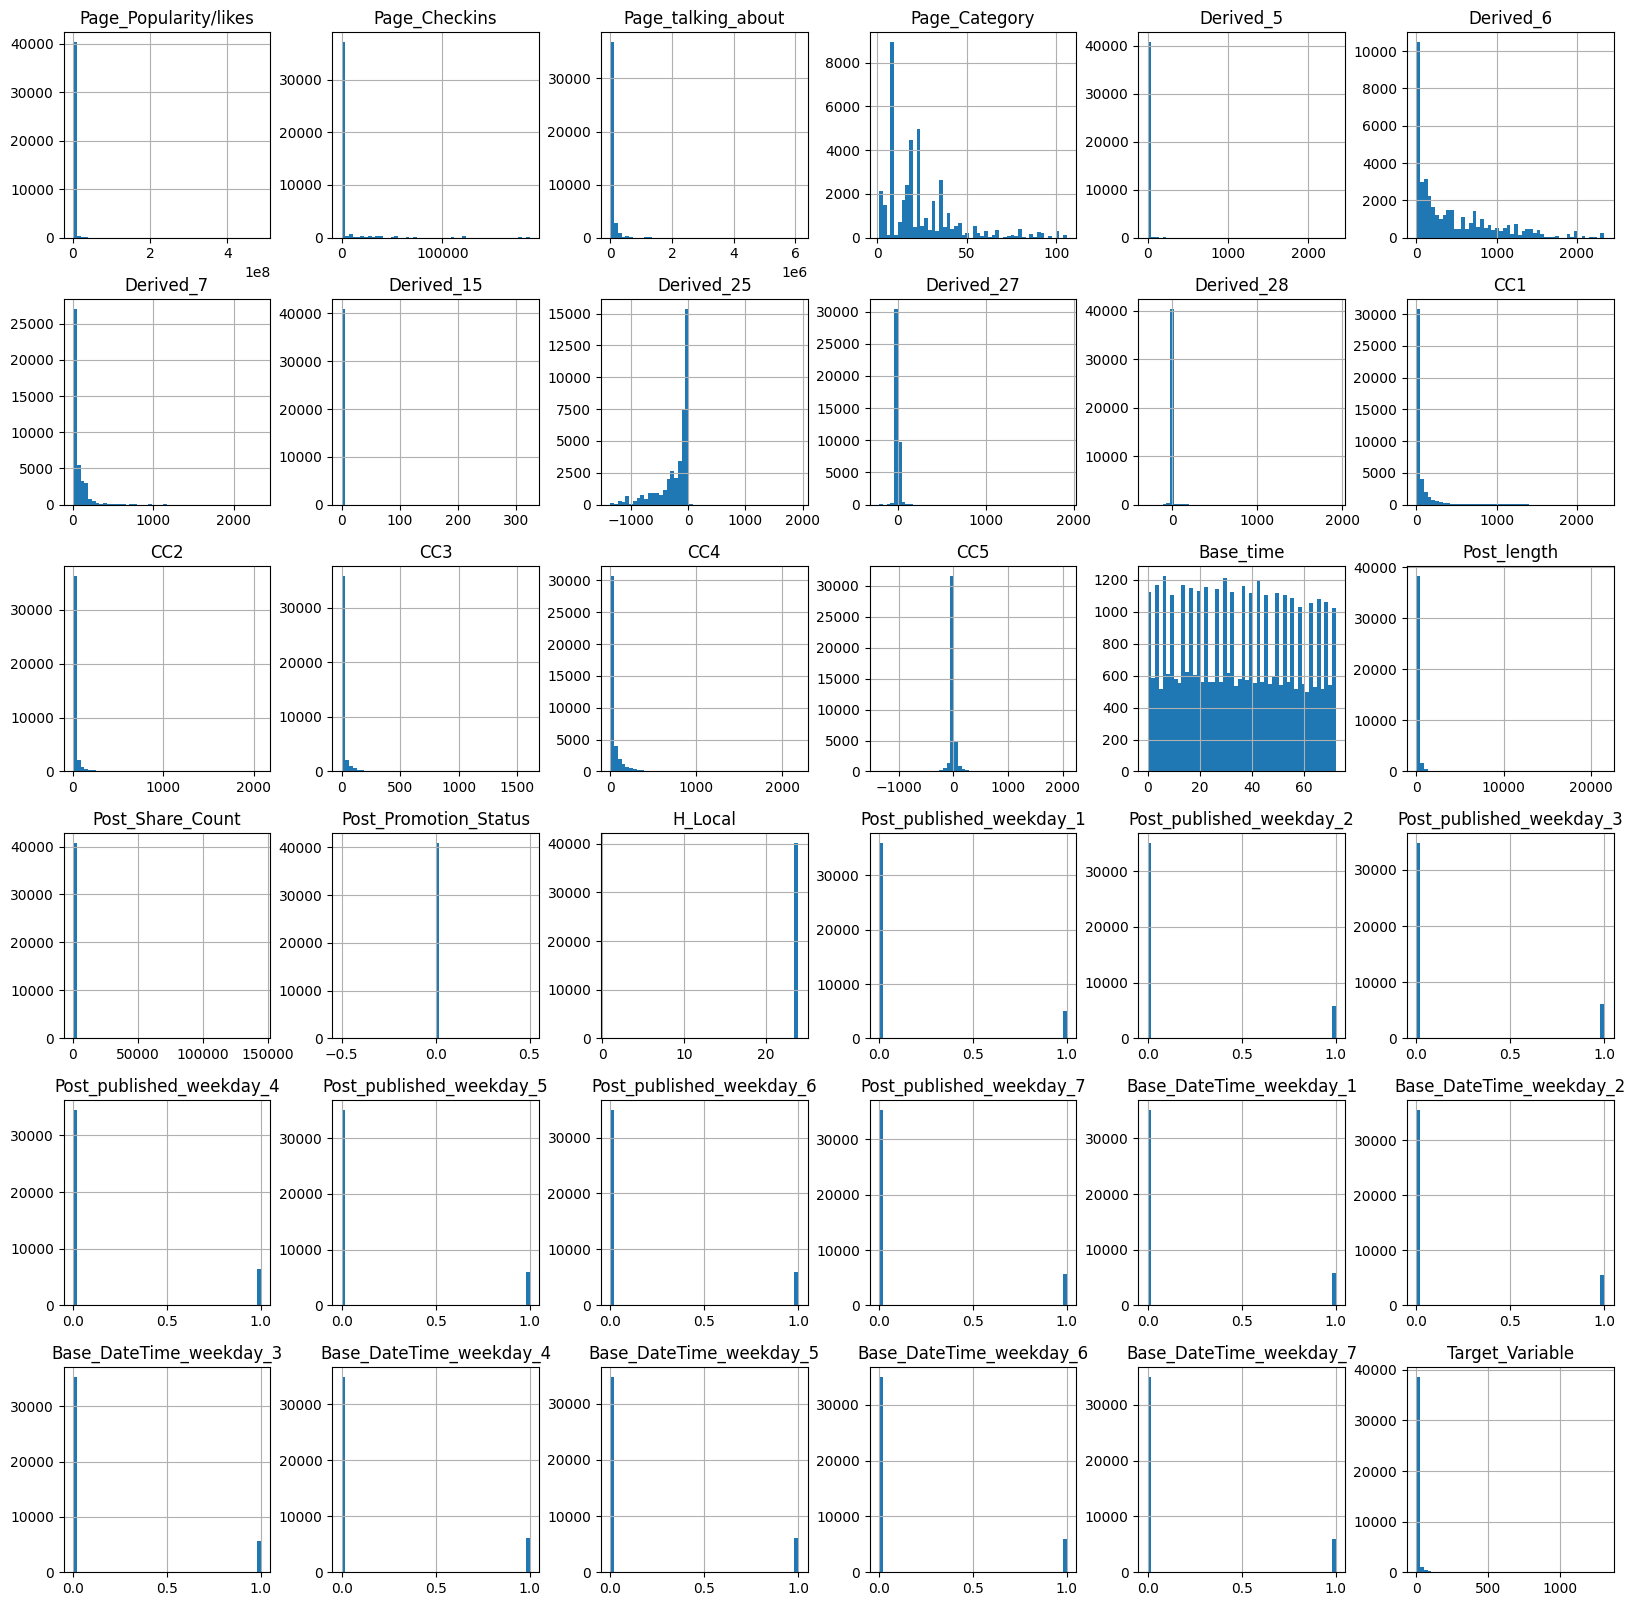

In [ ]:
columns_to_remove = ['Derived_8', 'Derived_9', 'Derived_10', 'Derived_11', 'Derived_12',
                     'Derived_13', 'Derived_14', 'Derived_16', 'Derived_17',
                     'Derived_18', 'Derived_19', 'Derived_20', 'Derived_21',
                     'Derived_22', 'Derived_23', 'Derived_24', 'Derived_26',
                     'Derived_29']

data_clean = data.drop(columns_to_remove, axis=1)


print(data_clean.info())

data_clean.hist(bins=50,figsize=(20,20))
plt.show()

It is done, the Heuristics seems to be correct, Not any problem.

We now show the data base with a heat map : with all the columns :

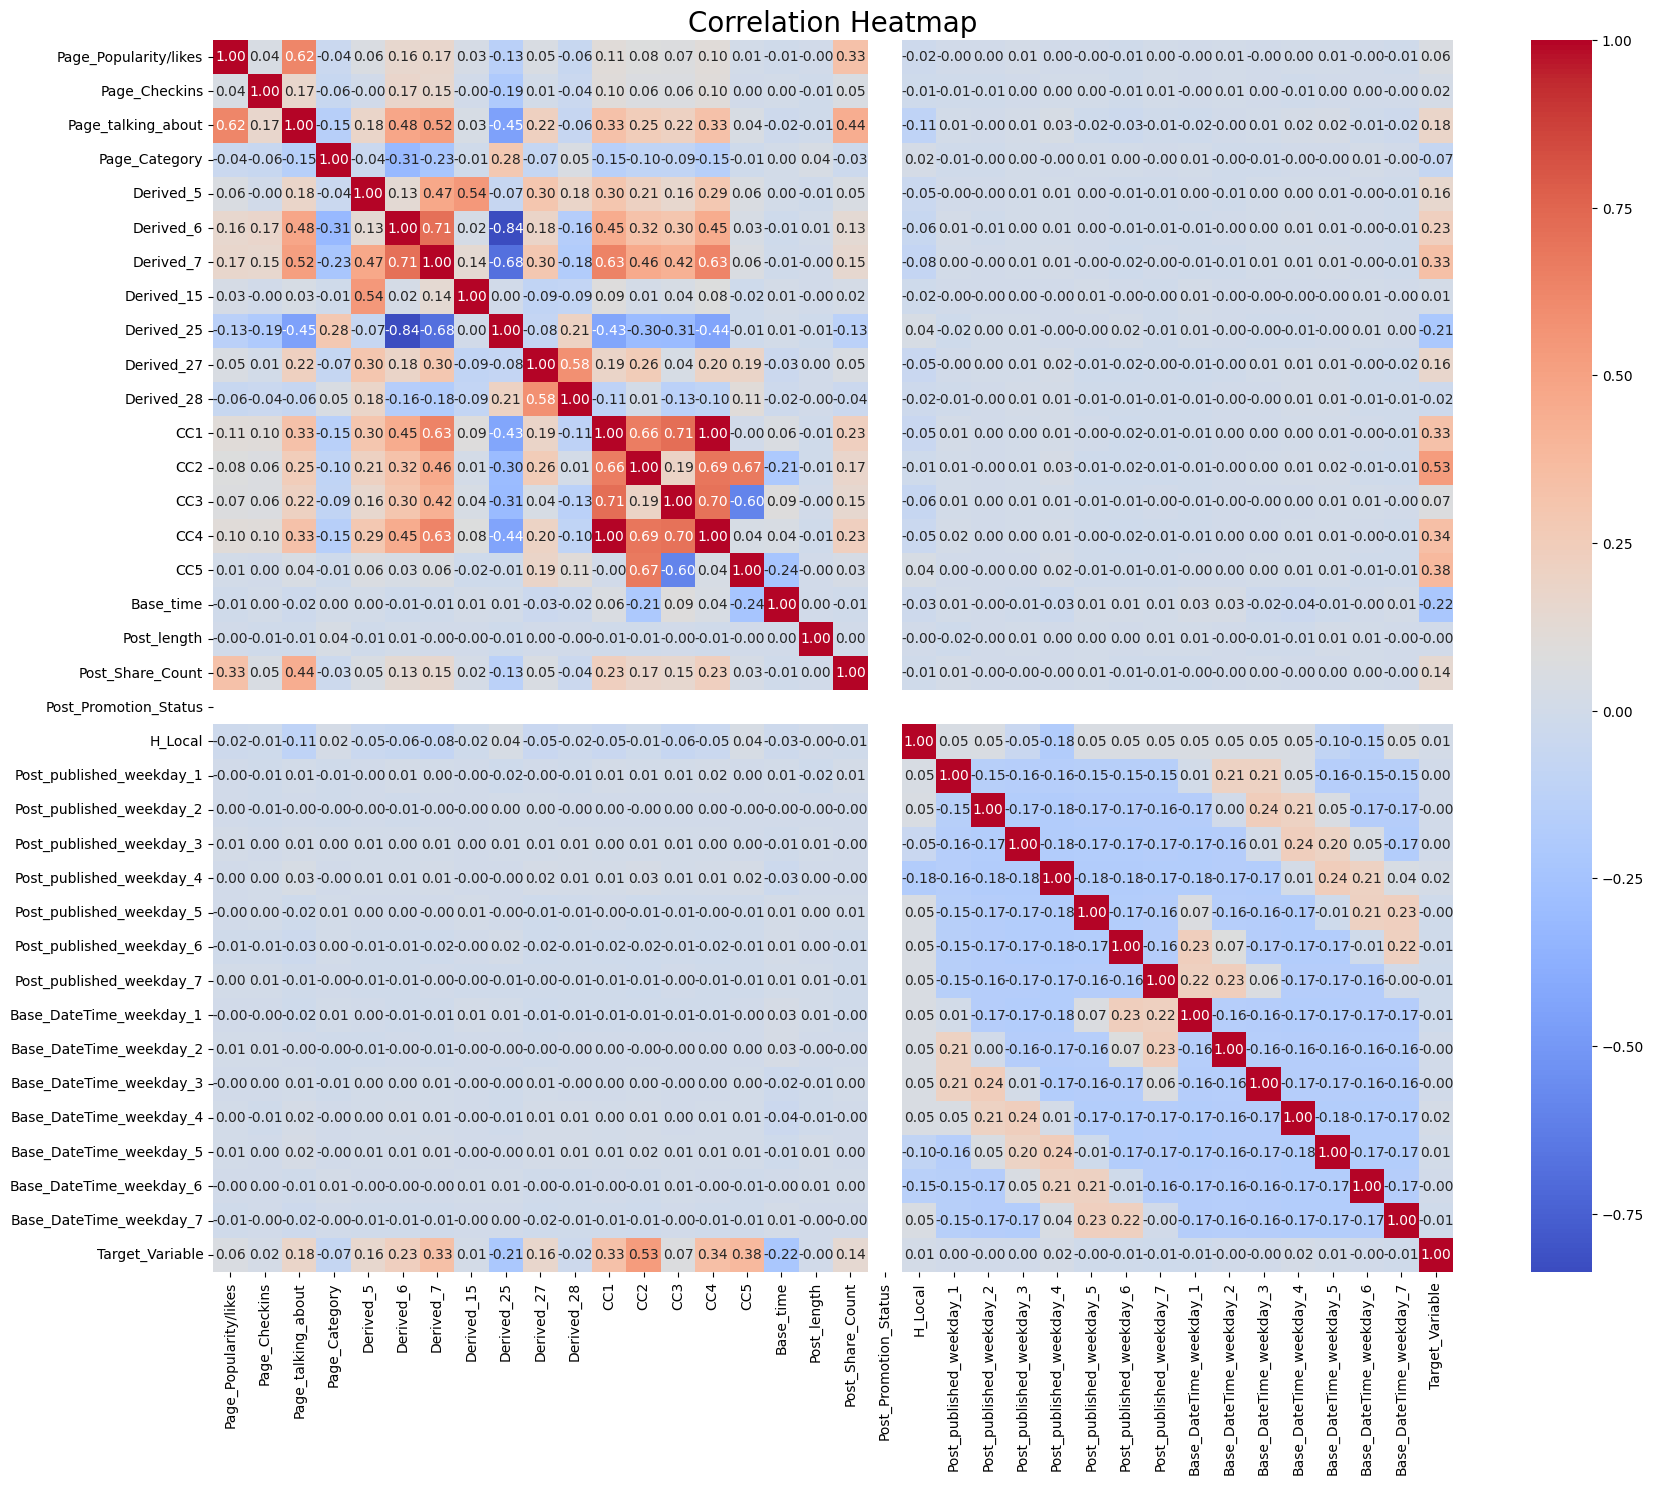

In [ ]:
selected_columns = [
    'Page_Popularity/likes', 'Page_Checkins', 'Page_talking_about', 'Page_Category',
    'Derived_5', 'Derived_6', 'Derived_7', 'Derived_15', 'Derived_25', 'Derived_27',
    'Derived_28', 'CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'Base_time', 'Post_length',
    'Post_Share_Count', 'Post_Promotion_Status', 'H_Local', 'Post_published_weekday_1',
    'Post_published_weekday_2', 'Post_published_weekday_3', 'Post_published_weekday_4',
    'Post_published_weekday_5', 'Post_published_weekday_6', 'Post_published_weekday_7',
    'Base_DateTime_weekday_1', 'Base_DateTime_weekday_2', 'Base_DateTime_weekday_3',
    'Base_DateTime_weekday_4', 'Base_DateTime_weekday_5', 'Base_DateTime_weekday_6',
    'Base_DateTime_weekday_7', 'Target_Variable'
]

selected_data = data_clean[selected_columns]


plt.figure(figsize=(20, 16))
heatmap = sns.heatmap(selected_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.set_title("Correlation Heatmap", fontsize=20)
plt.show()

We observ that now all the corelations were removed : exept the one between CC1 and CC4 : but I want to keep the two because that are the objects of our study : that is what we want to predict.
I don't understand why the column Post_promotio_status is empty : we will check this collumn :

In [ ]:
print(data_clean["Post_Promotion_Status"])

0        0
1        0
2        0
3        0
4        0
        ..
40943    0
40944    0
40945    0
40946    0
40947    0
Name: Post_Promotion_Status, Length: 40948, dtype: int64


The collumn seems to be only composed of zeros. We will check this with the same code as Derived_10 :

In [ ]:
column_name = 'Post_Promotion_Status'

# Calculus of the average value :
mean_value = data_clean[column_name].mean()

# Calculus of the standard deviation
std_deviation = data_clean[column_name].std()
zero_count = (data_clean[column_name] == 0).sum()  # Count the number of zeros
zero_ratio = 100*zero_count/len(data['Post_Promotion_Status'])
# print of the results :
print(f"Mean of the column :'{column_name}': {mean_value}")
print(f"Standart deviation of the column :'{column_name}': {std_deviation}")
print(f"Number of values equal to zero : '{column_name}': {zero_count}")
print(f"Ratio of values equal to zero :'{column_name}': {zero_ratio}","%")

Mean of the column :'Post_Promotion_Status': 0.0
Standart deviation of the column :'Post_Promotion_Status': 0.0
Number of values equal to zero : 'Post_Promotion_Status': 40948
Ratio of values equal to zero :'Post_Promotion_Status': 100.0 %


This column is empty : we can remove it :

I now see that there is a negative corelation between Derived_25 and Derived_6 of -0.84 (minus 84 %). I will remove Derived_25 : my code did not took acount the negative corelations.

In [ ]:
columns_to_remove = ['Post_Promotion_Status', 'Derived_25']

data_clean1 = data_clean.drop(columns_to_remove, axis=1)


print(data_clean1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40948 entries, 0 to 40947
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Page_Popularity/likes     40948 non-null  int64  
 1   Page_Checkins             40948 non-null  int64  
 2   Page_talking_about        40948 non-null  int64  
 3   Page_Category             40948 non-null  int64  
 4   Derived_5                 40948 non-null  float64
 5   Derived_6                 40948 non-null  float64
 6   Derived_7                 40948 non-null  float64
 7   Derived_15                40948 non-null  float64
 8   Derived_27                40948 non-null  float64
 9   Derived_28                40948 non-null  float64
 10  CC1                       40948 non-null  int64  
 11  CC2                       40948 non-null  int64  
 12  CC3                       40948 non-null  int64  
 13  CC4                       40948 non-null  int64  
 14  CC5   

It is done: now we can re do our heat map :

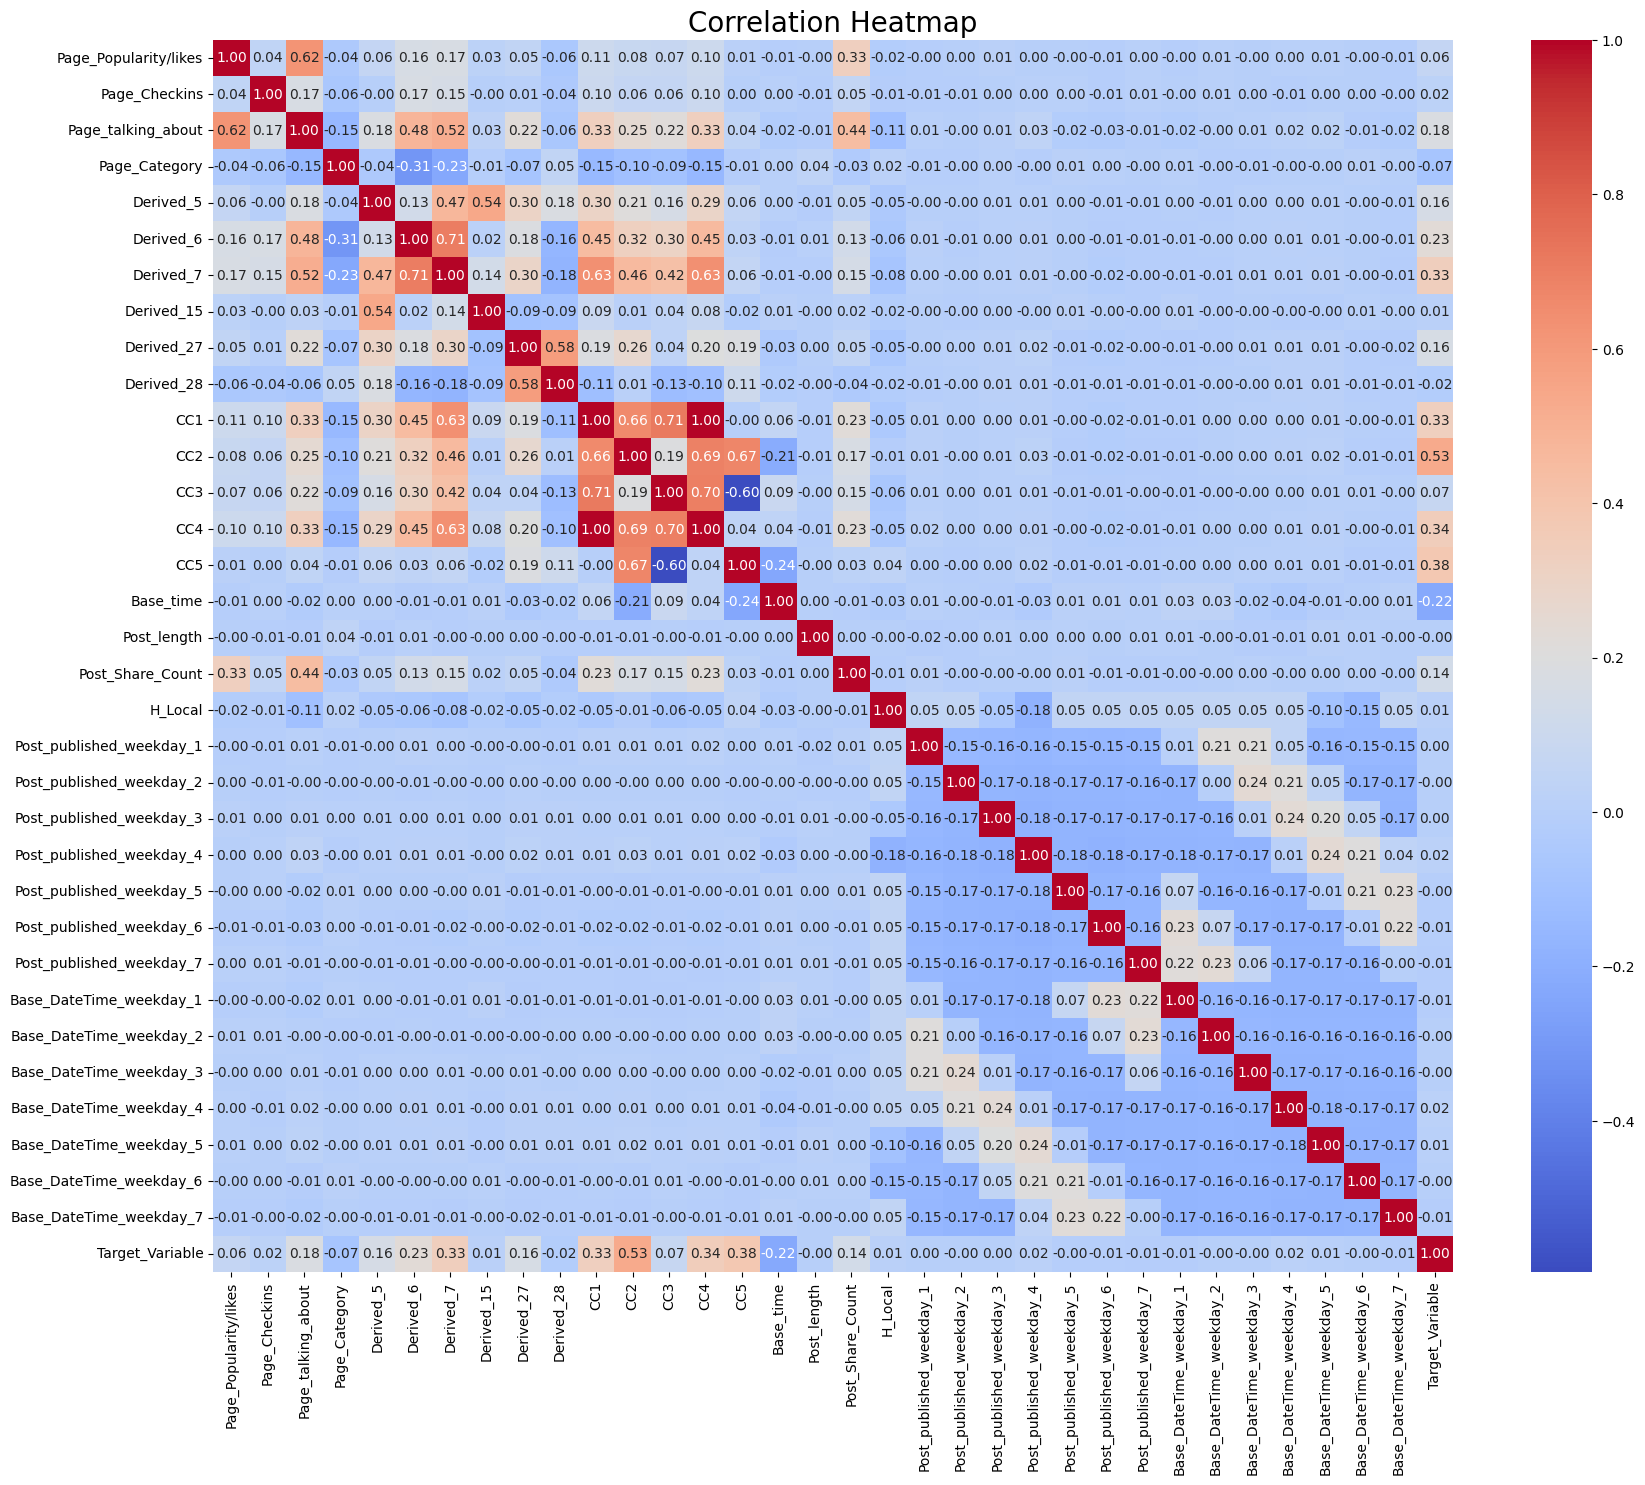

In [ ]:
selected_columns = [
    'Page_Popularity/likes', 'Page_Checkins', 'Page_talking_about', 'Page_Category',
    'Derived_5', 'Derived_6', 'Derived_7', 'Derived_15', 'Derived_27',
    'Derived_28', 'CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'Base_time', 'Post_length',
    'Post_Share_Count',  'H_Local', 'Post_published_weekday_1',
    'Post_published_weekday_2', 'Post_published_weekday_3', 'Post_published_weekday_4',
    'Post_published_weekday_5', 'Post_published_weekday_6', 'Post_published_weekday_7',
    'Base_DateTime_weekday_1', 'Base_DateTime_weekday_2', 'Base_DateTime_weekday_3',
    'Base_DateTime_weekday_4', 'Base_DateTime_weekday_5', 'Base_DateTime_weekday_6',
    'Base_DateTime_weekday_7', 'Target_Variable'
]

selected_data = data_clean1[selected_columns]


plt.figure(figsize=(20, 16))
heatmap = sns.heatmap(selected_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.set_title("Correlation Heatmap", fontsize=20)
plt.show()

It is fine : we see now only the corelation between CC1 and CC4 that I want to keep

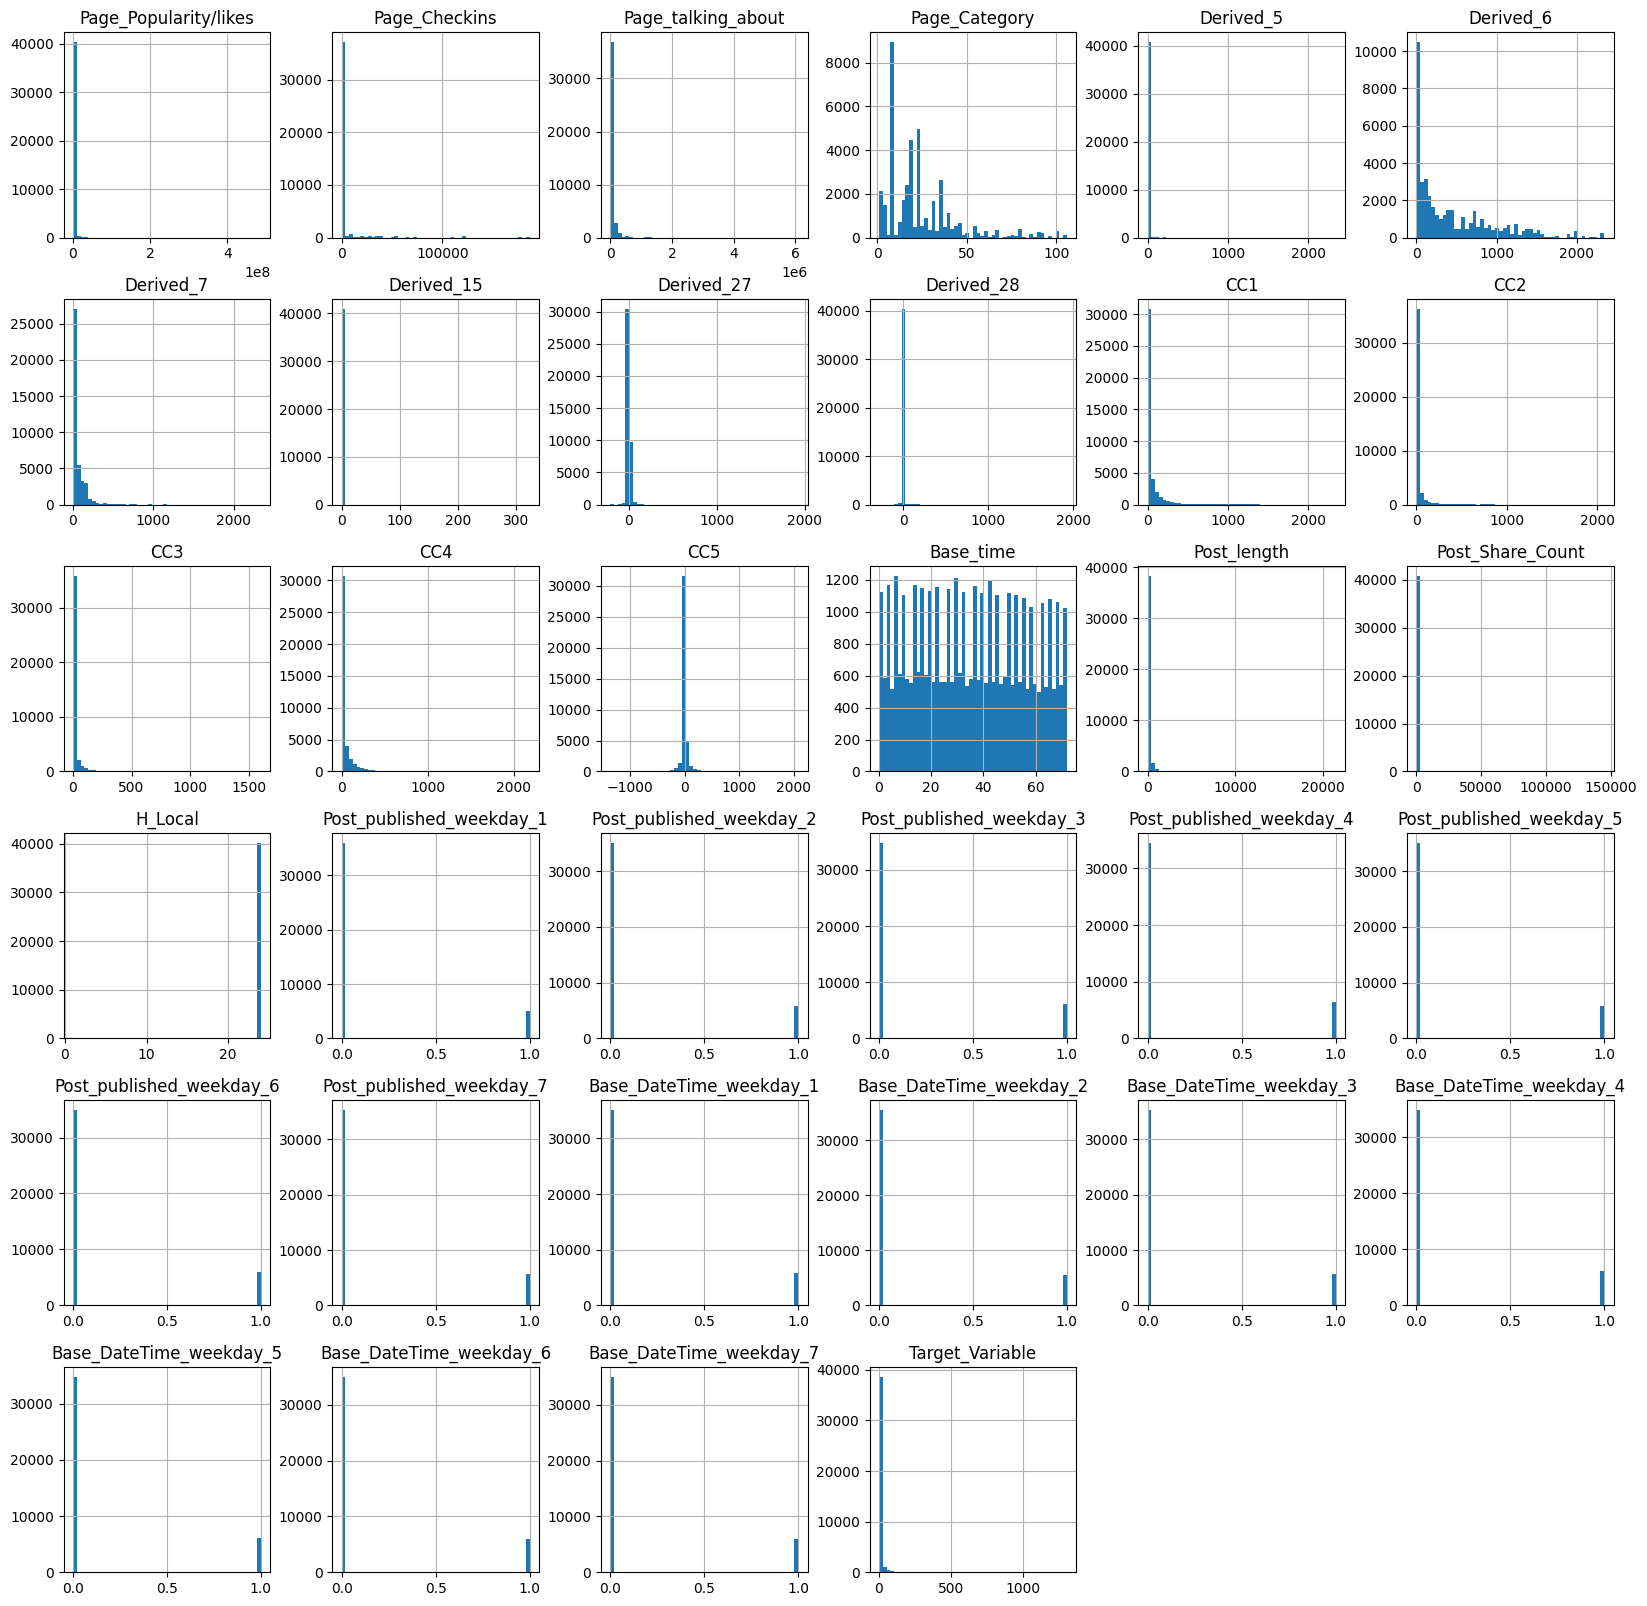

In [ ]:
data_clean1.hist(bins=50,figsize=(20,20))
plt.show()

I now want to determinate what we want to determine in our project : my objective will be to predict the number of comments on a post. Here is a representation of the variables that I can try to predict (found in the docuement of the maker of the data base)

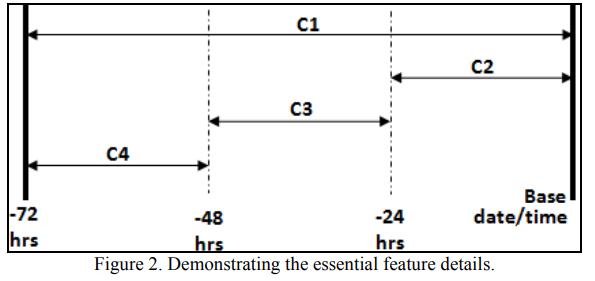





I think that the most important variable to determine is C1 : as it is the number of comments on a post on 72 houers.

I will try to perform a grid search : that need first to do a random forest

We have two files on this data base. A train and a test file. To study our model, we will not have to devide our file into two parts using a pipeline.

We add a test file : to test our model. We did not import it for the moment.

In [ ]:
path_file2 = "/Test_Case_10.csv"
#(path to be changed)
data_test = pd.read_csv(path_file)
print(data.head())
print("lenght  of the file :", len(data_test))

   Page_Popularity/likes  Page_Checkins  Page_talking_about  Page_Category  \
0                 634995              0                 463              1   
1                 634995              0                 463              1   
2                 634995              0                 463              1   
3                 634995              0                 463              1   
4                 634995              0                 463              1   

   Derived_5  Derived_6  Derived_7  Derived_8  Derived_9  Derived_10  ...  \
0        0.0      806.0  11.291045        1.0  70.495138         0.0  ...   
1        0.0      806.0  11.291045        1.0  70.495138         0.0  ...   
2        0.0      806.0  11.291045        1.0  70.495138         0.0  ...   
3        0.0      806.0  11.291045        1.0  70.495138         0.0  ...   
4        0.0      806.0  11.291045        1.0  70.495138         0.0  ...   

   Post_published_weekday_6  Post_published_weekday_7  \
0          

It worked, the file is well imported.

We drop the collumns of the test file that we don't want : the same one that we droped in the train file

In [ ]:
columns_to_remove = ['Derived_8', 'Derived_9', 'Derived_10', 'Derived_11', 'Derived_12',
                     'Derived_13', 'Derived_14', 'Derived_16', 'Derived_17',
                     'Derived_18', 'Derived_19', 'Derived_20', 'Derived_21',
                     'Derived_22', 'Derived_23', 'Derived_24', 'Derived_26',
                     'Derived_29', 'Post_Promotion_Status', 'Derived_25']

data_test_clean = data.drop(columns_to_remove, axis=1)


print(data_test_clean.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40948 entries, 0 to 40947
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Page_Popularity/likes     40948 non-null  int64  
 1   Page_Checkins             40948 non-null  int64  
 2   Page_talking_about        40948 non-null  int64  
 3   Page_Category             40948 non-null  int64  
 4   Derived_5                 40948 non-null  float64
 5   Derived_6                 40948 non-null  float64
 6   Derived_7                 40948 non-null  float64
 7   Derived_15                40948 non-null  float64
 8   Derived_27                40948 non-null  float64
 9   Derived_28                40948 non-null  float64
 10  CC1                       40948 non-null  int64  
 11  CC2                       40948 non-null  int64  
 12  CC3                       40948 non-null  int64  
 13  CC4                       40948 non-null  int64  
 14  CC5   

The test data part is well imported

In [ ]:
#Train part :
X_train = data_clean1.drop(['CC1', 'CC2', 'CC3', 'CC4', 'CC5'], axis=1) #I don't want to make any prediction of CC1 using others CCx
y_train = data_clean1['CC1']

#Test part :
X_test = data_test_clean.drop(['CC1', 'CC2', 'CC3', 'CC4', 'CC5'], axis=1)  #I don't want to make any prediction of CC1 using others CCx
y_test = data_test_clean['CC1']


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

#training :
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],

}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 780.8338210886157
Best Hyperparameters: {'max_depth': 20, 'n_estimators': 200}
R-squared: 0.9583827595059602


In [ ]:

# Utilisez les meilleurs hyperparamètres pour ré-entraîner le modèle
best_rf_model = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                       max_depth=best_params['max_depth'],
                                       random_state=42)

best_rf_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_best = best_rf_model.predict(X_test)

# Calcul de l'erreur moyenne quadratique
mse_best = mean_squared_error(y_test, y_pred_best)
print(f"Mean Squared Error with Best Hyperparameters: {mse_best}")
r2_best = r2_score(y_test, y_pred_best)
print(f"R-squared: {r2_best}")

Mean Squared Error with Best Hyperparameters: 810.5752086252447
R-squared: 0.9567975893400308


Optimize the grid search lowers a bit the performance of the code.

I think that the r2 that we have is sufficient. It will not be possible to gain a lot of performance. We will try others way to find better performances, but it is more to train than to actualy find a better model.

We try to use a Gradient Boosting Regressor at first :

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Training
X_train = data_clean1.drop(['CC1', 'CC2', 'CC3', 'CC4', 'CC5'], axis=1) #I don't want to make any prediction of CC1 using others CCx
y_train = data_clean1['CC1']

X_test = data_test_clean.drop(['CC1', 'CC2', 'CC3', 'CC4', 'CC5'], axis=1)  #I don't want to make any prediction of CC1 using others CCx
y_test = data_test_clean['CC1']

gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Mean Squared Error (Gradient Boosting): {mse_gb}")

# Hyperparameter tuning with GridSearchCV
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=5)
grid_search_gb.fit(X_train, y_train)

best_params_gb = grid_search_gb.best_params_
print(f"Best Hyperparameters (Gradient Boosting): {best_params_gb}")
r2_grad = r2_score(y_test, y_pred_gb)
print(f"R-squared: {r2_grad}")

Mean Squared Error (Gradient Boosting): 4878.267072022061
Best Hyperparameters (Gradient Boosting): {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
R-squared: 0.7399958756301656


THis programm gives less efficient results. We will keep the initial forest classification : with the results :

Mean Squared Error: 780.8338210886157 and
R-squared: 0.9583827595059602

We notice that we have prety high MSE and close to one r2. We think that we have only a small number of predictions failed, but that they are failed by a lot. In deed, if a public personality share a post, or speak about it, plenty of people will come to comment it, in this case our prediction is irrelevent. But in any other cases, our prediction is really good. We are not rong often, but when we are wrong it is by a lot. and it is impossible to find someting into our data base to solve this problem. As we can't know what post the data set is about, we can't scram new data. So, we can't do anything about it.

We try to do a bonus work. We try to predict CC2 in fonction of CC3 and CC4 : it can be nice to find a model. We try with random forest : .

In [ ]:
X_train = data_clean1[['CC3', 'CC4']]
y_train = data_clean1['CC2']

X_test = data_test_clean[['CC3', 'CC4']]
y_test = data_test_clean['CC2']

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params_CCx = grid_search.best_params_
print(f"Best Hyperparameters: {best_params_CCx}")

r2_CCx = r2_score(y_test, y_pred)
print(f"R-squared: {r2_CCx}")

Mean Squared Error: 93.5792291889962
Best Hyperparameters: {'max_depth': 10, 'n_estimators': 50}
R-squared: 0.9842674800986632


We used a Grid Search. The MSE and R2 optained are more than accpetbale, this model can clearly be used to determine the numer of comment optained a day, just by looking at the number of comments the 2 days before.

We tryed to use a classification to try to have a better prediction : but the programm of classification need to muth ram to work. Our data frame is to big to run it. We will remain with the prediction. I honestly think that our result are more than acceptable.

JUst to check the model that we choose : the random forest : we try it again into the training file :

We now try to transform our ptoject using an API, we will use FLASK

In [ ]:
pip install Flask

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from flask import Flask, request, jsonify
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Load the data
path_file = "/content/Features_Variant_1.csv"
data = pd.read_csv(path_file)


# Define the Flask app
app = Flask(__name__)

# Define a route for making predictions
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get data from the request
        data = request.get_json()
        # Assuming data is a dictionary with C2 and CC3 features
        input_data = pd.DataFrame({
            'C2': [data['C2']],
            'CC3': [data['CC3']]
        })

        # Make prediction for CC4
        prediction = rf_model.predict(input_data)

        # Return the prediction as JSON
        return jsonify({'prediction_CC4': prediction.tolist()})
    except Exception as e:
        return jsonify({'error': str(e)})

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
curl -X POST -H "Content-Type: application/json" -d '{"C2": 1, "CC3": 2}' http://127.0.0.1:5000/predict